In [35]:
import pandas as pd
import numpy as np

# 1. Load Dataset
data = pd.read_csv('Healthcare-Diabetes.csv')

In [37]:
#2. Tinjauan Data Awal
print("Data Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Data Overview:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2

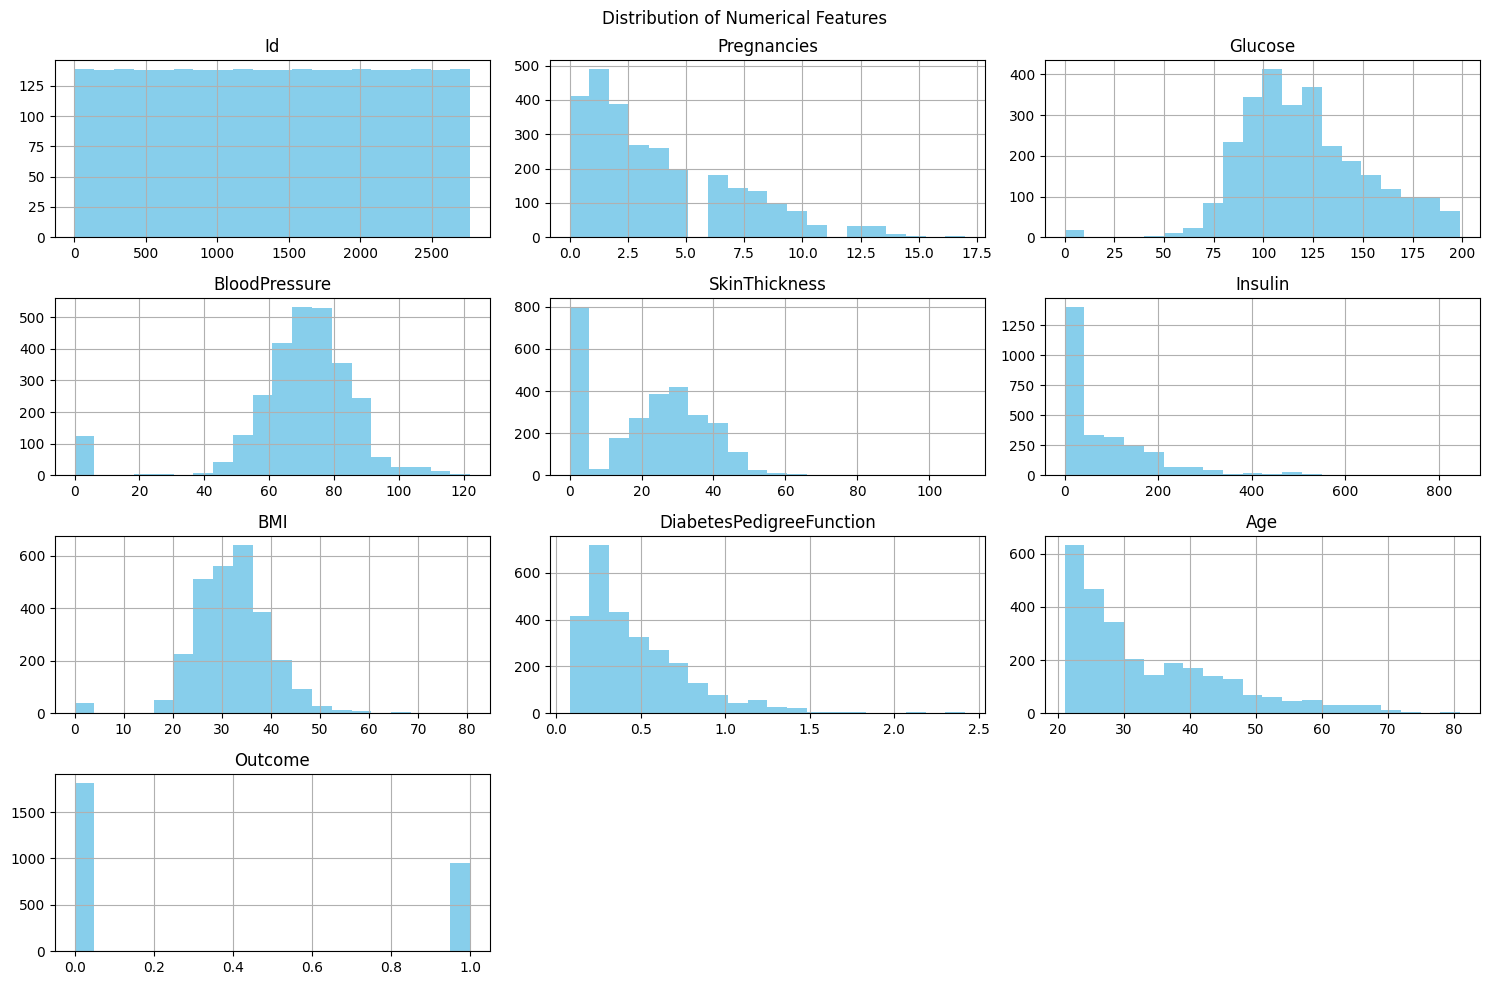

In [39]:
# 3. Visualisasi Distribusi Kolom
# Membuat histogram untuk variabel numerik
data.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

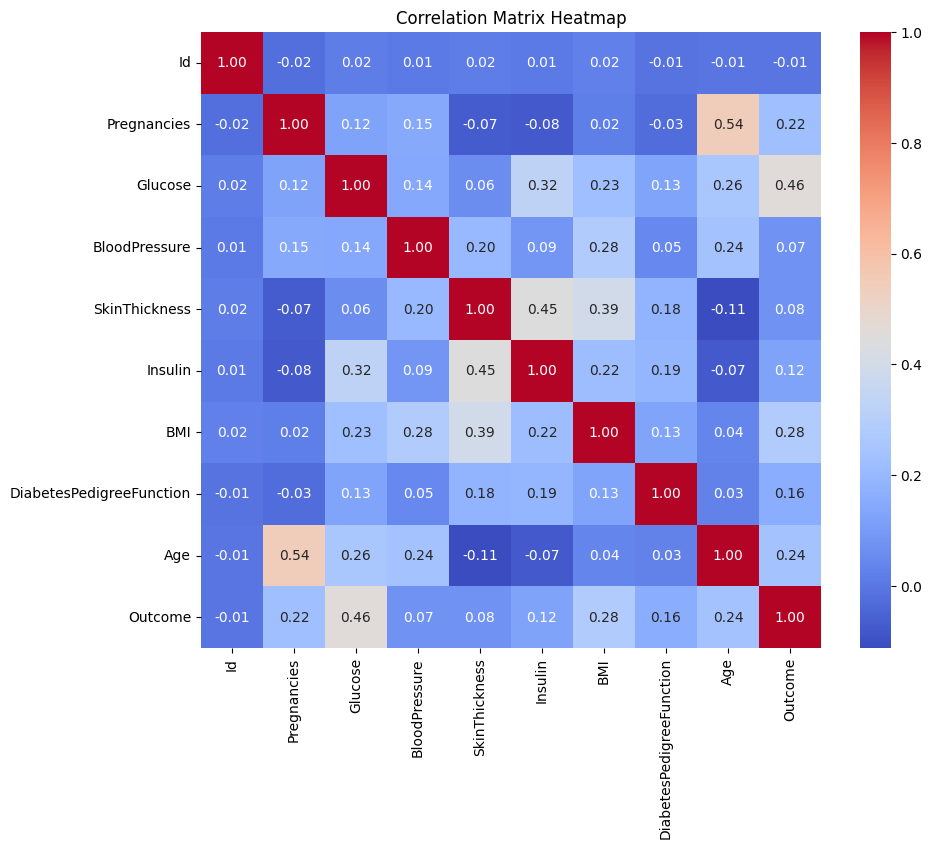

In [40]:
# 4. Korelasi Antar Variabel Numerik
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:
# 5. Mengatasi Missing Values
# Menghitung jumlah nilai yang hilang
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Values:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

# Mengisi nilai yang hilang tanpa menggunakan inplace=True
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column] = data[column].fillna(data[column].median())
    
# Jika ada kolom kategorikal dengan nilai hilang
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values:
                          Missing Values  Percentage
Id                                     0         0.0
Pregnancies                            0         0.0
Glucose                                0         0.0
BloodPressure                          0         0.0
SkinThickness                          0         0.0
Insulin                                0         0.0
BMI                                    0         0.0
DiabetesPedigreeFunction               0         0.0
Age                                    0         0.0
Outcome                                0         0.0

Missing Values After Handling:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [26]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [43]:
# 7. Split Data
# Asumsikan target adalah kolom terakhir
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# 8. Train Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.99      0.96      0.98       187

    accuracy                           0.98       554
   macro avg       0.99      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



<Figure size 800x600 with 0 Axes>

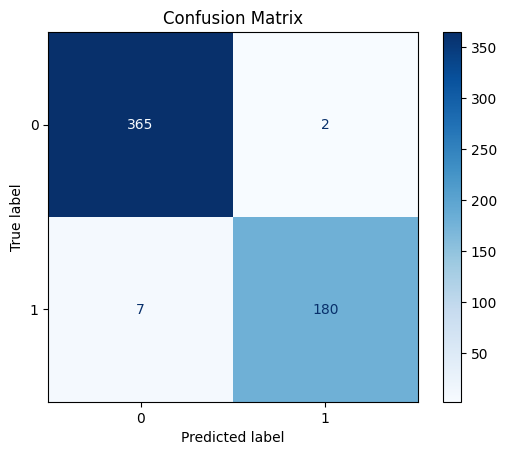

In [44]:
# 9. Evaluate Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

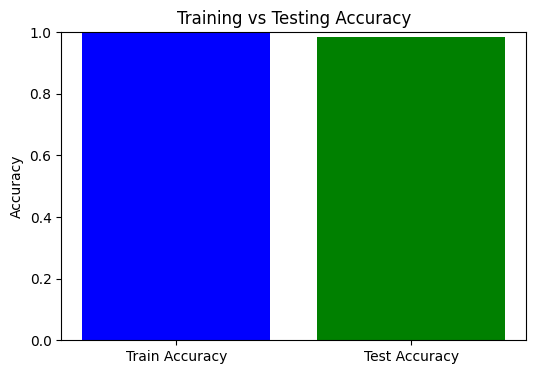

In [33]:
# 10. Training vs Testing Accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()